# pip install ruptures

In [1]:
import pandas as pd
import numpy as np
from pandas import json_normalize
import json
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
import ruptures as rpt
from collections import Counter

In [2]:
dfBatch1 = pd.read_csv('MTDataBatch1\MTDataBatch1.rpt', delimiter='|')

In [3]:
def input_process(df):
    
    # delete inconsistent rows with title values
    df = df.loc[df['Id'].astype(str).str.isnumeric()]
        
    # load 'Data' from json
    json_data = df['Data'].apply(json.loads)
    df_data = pd.json_normalize(json_data)

    
    # drop origial 'Data' and join with json data
    df = df.drop('Data', axis = 1)
    df = pd.concat([df.reset_index(drop=True), df_data], axis=1)
    df['DeviceId'] = df['DeviceId'].astype(str)
    return df

In [4]:
df = input_process(dfBatch1)

In [5]:
df.loc[1684079]

Id                                                   195391320
CreatedAt                   2021-11-22 02:04:57.8307232 +00:00
UpdatedAt                   2021-11-22 02:04:57.9257593 +00:00
DeviceId                                       015262001276442
State                                                        1
timeStamp                                 2021-11-22T02:04:17Z
event                                    [{'type': 'stopped'}]
sensors.battery.extpower                                 False
sensors.battery.temp                                      27.2
sensors.battery.percent                                   22.3
sensors.battery.solarmv                                   2091
sensors.battery.current                                    -43
sensors.battery.voltage                                   3456
sensors.battery.solarma                                     67
sensors.battery.charging                                 False
location.bearing                                       

In [10]:
display(df)

Id                           CreatedAt  \
0            10046  2021-04-20 17:18:57.3601057 +00:00   
1            10049  2021-04-20 17:18:57.9206698 +00:00   
2            15189  2021-04-20 17:30:00.0973275 +00:00   
3            15190  2021-04-20 17:30:00.5204188 +00:00   
4            15191  2021-04-20 17:30:00.6604193 +00:00   
...            ...                                 ...   
1684078  195389569  2021-11-22 02:02:07.3194074 +00:00   
1684079  195391320  2021-11-22 02:04:57.8307232 +00:00   
1684080  196545125  2021-11-23 02:05:44.6179891 +00:00   
1684081  197957676  2021-11-24 02:06:18.7314233 +00:00   
1684082  197957683  2021-11-24 02:06:19.3460223 +00:00   

                                  UpdatedAt         DeviceId State  \
0        2021-04-20 17:18:57.4751133 +00:00  015262001277846     1   
1        2021-04-20 17:18:58.0006530 +00:00  015262001277846     1   
2        2021-04-20 17:30:00.1973672 +00:00  015262001277846     1   
3        2021-04-20 17:30:00.6554035 +00:00  015262001277846     1   
4        2021-04-20 17:30:00.7254268 +00:00  015262001277846     1   
...                                     ...              ...   ...   
1684078  2021-11-22 02:02:07.4609948 +00:00  015262001276442     1   
1684079  2021-11-22 02:04:57.9257593 +00:00  015262001276442     1   
1684080  2021-11-23 02:05:44.7707739 +00:00  015262001276442     1   
1684081  2021-11-24 02:06:18.8826478 +00:00  015262001276442     1   
1684082  2021-11-24 02:06:19.4060168 +00:00  015262001276442     1   

                    timeStamp                  event  \
0        2021-04-20T17:18:26Z   [{'type': 'moving'}]   
1        2021-04-20T17:17:52Z   [{'type': 'moving'}]   
2        2021-04-20T17:27:29Z   [{'type': 'moving'}]   
3        2021-04-20T17:28:29Z   [{'type': 'moving'}]   
4        2021-04-20T17:21:30Z   [{'type': 'moving'}]   
...                       ...                    ...   
1684078  2021-11-22T02:01:23Z   [{'type': 'moving'}]   
1684079  2021-11-22T02:04:17Z  [{'type': 'stopped'}]   
1684080  2021-11-23T02:05:02Z  [{'type': 'stopped'}]   
1684081  2021-11-24T02:05:36Z   [{'type': 'moving'}]   
1684082  2021-11-24T02:05:02Z   [{'type': 'moving'}]   

         sensors.battery.extpower  sensors.battery.temp  \
0                           False                  15.8   
1                           False                  15.9   
2                           False                  16.6   
3                           False                  16.7   
4                           False                  16.0   
...                           ...                   ...   
1684078                     False                  26.3   
1684079                     False                  27.2   
1684080                     False                  32.8   
1684081                     False                  24.8   
1684082                     False                  24.7   

         sensors.battery.percent  ...  location.altitude  location.longitude  \
0                           72.4  ...             65.583          151.218047   
1                           72.3  ...             30.239          151.218558   
2                           72.4  ...              9.031          151.215553   
3                           72.4  ...             16.769          151.214650   
4                           72.4  ...             49.246          151.218837   
...                          ...  ...                ...                 ...   
1684078                     22.4  ...            323.936          147.579510   
1684079                     22.3  ...            323.110          147.579400   
1684080                     22.6  ...            323.110          147.579400   
1684081                     21.7  ...            311.423          147.582815   
1684082                     22.1  ...            323.110          147.579400   

         location.numSats  location.source  location.latitude  location.speed  \
0                    11.0              gps         -33

In [6]:
normalizedEvent = json_normalize(df['event'], record_path = None)
normalizedEvent = json_normalize(normalizedEvent[0])

In [7]:
df['event'] = normalizedEvent['type']
display(df)

Id                           CreatedAt  \
0            10046  2021-04-20 17:18:57.3601057 +00:00   
1            10049  2021-04-20 17:18:57.9206698 +00:00   
2            15189  2021-04-20 17:30:00.0973275 +00:00   
3            15190  2021-04-20 17:30:00.5204188 +00:00   
4            15191  2021-04-20 17:30:00.6604193 +00:00   
...            ...                                 ...   
1684078  195389569  2021-11-22 02:02:07.3194074 +00:00   
1684079  195391320  2021-11-22 02:04:57.8307232 +00:00   
1684080  196545125  2021-11-23 02:05:44.6179891 +00:00   
1684081  197957676  2021-11-24 02:06:18.7314233 +00:00   
1684082  197957683  2021-11-24 02:06:19.3460223 +00:00   

                                  UpdatedAt         DeviceId State  \
0        2021-04-20 17:18:57.4751133 +00:00  015262001277846     1   
1        2021-04-20 17:18:58.0006530 +00:00  015262001277846     1   
2        2021-04-20 17:30:00.1973672 +00:00  015262001277846     1   
3        2021-04-20 17:30:00.6554035 +00:00  015262001277846     1   
4        2021-04-20 17:30:00.7254268 +00:00  015262001277846     1   
...                                     ...              ...   ...   
1684078  2021-11-22 02:02:07.4609948 +00:00  015262001276442     1   
1684079  2021-11-22 02:04:57.9257593 +00:00  015262001276442     1   
1684080  2021-11-23 02:05:44.7707739 +00:00  015262001276442     1   
1684081  2021-11-24 02:06:18.8826478 +00:00  015262001276442     1   
1684082  2021-11-24 02:06:19.4060168 +00:00  015262001276442     1   

                    timeStamp    event  sensors.battery.extpower  \
0        2021-04-20T17:18:26Z   moving                     False   
1        2021-04-20T17:17:52Z   moving                     False   
2        2021-04-20T17:27:29Z   moving                     False   
3        2021-04-20T17:28:29Z   moving                     False   
4        2021-04-20T17:21:30Z   moving                     False   
...                       ...      ...                       ...   
1684078  2021-11-22T02:01:23Z   moving                     False   
1684079  2021-11-22T02:04:17Z  stopped                     False   
1684080  2021-11-23T02:05:02Z  stopped                     False   
1684081  2021-11-24T02:05:36Z   moving                     False   
1684082  2021-11-24T02:05:02Z   moving                     False   

         sensors.battery.temp  sensors.battery.percent  ...  \
0                        15.8                     72.4  ...   
1                        15.9                     72.3  ...   
2                        16.6                     72.4  ...   
3                        16.7                     72.4  ...   
4                        16.0                     72.4  ...   
...                       ...                      ...  ...   
1684078                  26.3                     22.4  ...   
1684079                  27.2                     22.3  ...   
1684080                  32.8                     22.6  ...   
1684081                  24.8                     21.7  ...   
1684082                  24.7                     22.1  ...   

         location.altitude  location.longitude  location.numSats  \
0                   65.583          151.218047              11.0   
1                   30.239          151.218558              15.0   
2                    9.031          151.215553              14.0   
3                   16.769          151.214650              16.0   
4                   49.246          151.218837              13.0   
...                    ...                 ...               ...   
1684078            323.936          147.579510              10.0   
1684079            323.110          147.579400              12.0   
1684080            323.110          147.579400              12.0   
1684081            311.423          147.582815              14.0   
1684082            323.110          147.579400              12.0   

         location.source  location.latitude  location.speed  \
0                    gps

In [8]:
batch1 = df
display(batch1)

Id                           CreatedAt  \
0            10046  2021-04-20 17:18:57.3601057 +00:00   
1            10049  2021-04-20 17:18:57.9206698 +00:00   
2            15189  2021-04-20 17:30:00.0973275 +00:00   
3            15190  2021-04-20 17:30:00.5204188 +00:00   
4            15191  2021-04-20 17:30:00.6604193 +00:00   
...            ...                                 ...   
1684078  195389569  2021-11-22 02:02:07.3194074 +00:00   
1684079  195391320  2021-11-22 02:04:57.8307232 +00:00   
1684080  196545125  2021-11-23 02:05:44.6179891 +00:00   
1684081  197957676  2021-11-24 02:06:18.7314233 +00:00   
1684082  197957683  2021-11-24 02:06:19.3460223 +00:00   

                                  UpdatedAt         DeviceId State  \
0        2021-04-20 17:18:57.4751133 +00:00  015262001277846     1   
1        2021-04-20 17:18:58.0006530 +00:00  015262001277846     1   
2        2021-04-20 17:30:00.1973672 +00:00  015262001277846     1   
3        2021-04-20 17:30:00.6554035 +00:00  015262001277846     1   
4        2021-04-20 17:30:00.7254268 +00:00  015262001277846     1   
...                                     ...              ...   ...   
1684078  2021-11-22 02:02:07.4609948 +00:00  015262001276442     1   
1684079  2021-11-22 02:04:57.9257593 +00:00  015262001276442     1   
1684080  2021-11-23 02:05:44.7707739 +00:00  015262001276442     1   
1684081  2021-11-24 02:06:18.8826478 +00:00  015262001276442     1   
1684082  2021-11-24 02:06:19.4060168 +00:00  015262001276442     1   

                    timeStamp    event  sensors.battery.extpower  \
0        2021-04-20T17:18:26Z   moving                     False   
1        2021-04-20T17:17:52Z   moving                     False   
2        2021-04-20T17:27:29Z   moving                     False   
3        2021-04-20T17:28:29Z   moving                     False   
4        2021-04-20T17:21:30Z   moving                     False   
...                       ...      ...                       ...   
1684078  2021-11-22T02:01:23Z   moving                     False   
1684079  2021-11-22T02:04:17Z  stopped                     False   
1684080  2021-11-23T02:05:02Z  stopped                     False   
1684081  2021-11-24T02:05:36Z   moving                     False   
1684082  2021-11-24T02:05:02Z   moving                     False   

         sensors.battery.temp  sensors.battery.percent  ...  \
0                        15.8                     72.4  ...   
1                        15.9                     72.3  ...   
2                        16.6                     72.4  ...   
3                        16.7                     72.4  ...   
4                        16.0                     72.4  ...   
...                       ...                      ...  ...   
1684078                  26.3                     22.4  ...   
1684079                  27.2                     22.3  ...   
1684080                  32.8                     22.6  ...   
1684081                  24.8                     21.7  ...   
1684082                  24.7                     22.1  ...   

         location.altitude  location.longitude  location.numSats  \
0                   65.583          151.218047              11.0   
1                   30.239          151.218558              15.0   
2                    9.031          151.215553              14.0   
3                   16.769          151.214650              16.0   
4                   49.246          151.218837              13.0   
...                    ...                 ...               ...   
1684078            323.936          147.579510              10.0   
1684079            323.110          147.579400              12.0   
1684080            323.110          147.579400              12.0   
1684081            311.423          147.582815              14.0   
1684082            323.110          147.579400              12.0   

         location.source  location.latitude  location.speed  \
0                    gps

In [9]:

def extract_timestamp_column(df):
        timestamp = datetime.strptime(df, "%Y-%m-%dT%H:%M:%S%z")
        timestamp = timestamp.astimezone(pytz.timezone("Australia/Sydney"))
        return timestamp

In [10]:
def get_power_diff(row):
    if row['solar_power'] == 0:
        return 0
    else:
        return row['solar_power'] - row['battery_power']

In [11]:
batch1 = batch1.assign(time=batch1['timeStamp'].apply(extract_timestamp_column))
batch1 = batch1.assign(solar_power=(batch1['sensors.battery.solarmv']/1000.0)*(batch1['sensors.battery.solarma']/1000.0))
batch1 = batch1.assign(battery_power=(batch1['sensors.battery.voltage']/1000.0)*(batch1['sensors.battery.current']/1000.0))
batch1['power_difference'] = batch1.apply(get_power_diff, axis=1)

In [12]:
print(pd.isna(batch1['sensors.battery.percent']).sum())

0


In [13]:
batch1.dtypes

Id                                                    object
CreatedAt                                             object
UpdatedAt                                             object
DeviceId                                              object
State                                                 object
timeStamp                                             object
event                                                 object
sensors.battery.extpower                                bool
sensors.battery.temp                                 float64
sensors.battery.percent                              float64
sensors.battery.solarmv                                int64
sensors.battery.current                                int64
sensors.battery.voltage                                int64
sensors.battery.solarma                                int64
sensors.battery.charging                                bool
location.bearing                                     float64
location.floor          

In [19]:
# batch1.set_index('time',inplace=True)

In [14]:
groupByDeviceIdAndTimeIndex = batch1.set_index(['DeviceId','time'])

In [15]:
groupByDeviceIdAndTimeIndex

Id  \
DeviceId        time                                   
015262001277846 2021-04-21 03:18:26+10:00      10046   
                2021-04-21 03:17:52+10:00      10049   
                2021-04-21 03:27:29+10:00      15189   
                2021-04-21 03:28:29+10:00      15190   
                2021-04-21 03:21:30+10:00      15191   
...                                              ...   
015262001276442 2021-11-22 13:01:23+11:00  195389569   
                2021-11-22 13:04:17+11:00  195391320   
                2021-11-23 13:05:02+11:00  196545125   
                2021-11-24 13:05:36+11:00  197957676   
                2021-11-24 13:05:02+11:00  197957683   

                                                                    CreatedAt  \
DeviceId        time                                                            
015262001277846 2021-04-21 03:18:26+10:00  2021-04-20 17:18:57.3601057 +00:00   
                2021-04-21 03:17:52+10:00  2021-04-20 17:18:57.9206698 +00:00   
                2021-04-21 03:27:29+10:00  2021-04-20 17:30:00.0973275 +00:00   
                2021-04-21 03:28:29+10:00  2021-04-20 17:30:00.5204188 +00:00   
                2021-04-21 03:21:30+10:00  2021-04-20 17:30:00.6604193 +00:00   
...                                                                       ...   
015262001276442 2021-11-22 13:01:23+11:00  2021-11-22 02:02:07.3194074 +00:00   
                2021-11-22 13:04:17+11:00  2021-11-22 02:04:57.8307232 +00:00   
                2021-11-23 13:05:02+11:00  2021-11-23 02:05:44.6179891 +00:00   
                2021-11-24 13:05:36+11:00  2021-11-24 02:06:18.7314233 +00:00   
                2021-11-24 13:05:02+11:00  2021-11-24 02:06:19.3460223 +00:00   

                                                                    UpdatedAt  \
DeviceId        time                                                            
015262001277846 2021-04-21 03:18:26+10:00  2021-04-20 17:18:57.4751133 +00:00   
                2021-04-21 03:17:52+10:00  2021-04-20 17:18:58.0006530 +00:00   
                2021-04-21 03:27:29+10:00  2021-04-20 17:30:00.1973672 +00:00   
                2021-04-21 03:28:29+10:00  2021-04-20 17:30:00.6554035 +00:00   
                2021-04-21 03:21:30+10:00  2021-04-20 17:30:00.7254268 +00:00   
...                                                                       ...   
015262001276442 2021-11-22 13:01:23+11:00  2021-11-22 02:02:07.4609948 +00:00   
                2021-11-22 13:04:17+11:00  2021-11-22 02:04:57.9257593 +00:00   
                2021-11-23 13:05:02+11:00  2021-11-23 02:05:44.7707739 +00:00   
                2021-11-24 13:05:36+11:00  2021-11-24 02:06:18.8826478 +00:00   
                2021-11-24 13:05:02+11:00  2021-11-24 02:06:19.4060168 +00:00   

                                          State             timeStamp  \
DeviceId        time                                                    
015262001277846 2021-04-21 03:18:26+10:00     1  2021-04-20T17:18:26Z   
                2021-04-21 03:17:52+10:00     1  2021-04-20T17:17:52Z   
                2021-04-21 03:27:29+10:00     1  2021-04-20T17:27:29Z   
                2021-04-21 03:28:29+10:00     1  2021-04-20T17:28:29Z   
                2021-04-21 03:21:30+10:00     1  2021-04-20T17:21:30Z   
...                                         ...                   ...   
015262001276442 2021-11-22 13:01:23+11:00     1  2021-11-22T02:01:23Z   
                2021-11-22 13:04:17+11:00     1  2021-11-22T02:04:17Z   
                2021-11-23 13:05:02+11:00     1  2021-11-23T02:05:02Z   
                2021-11-24 13:05:36+11:00     1  2021-11-24T02:05:36Z   
                2021-11-24 13:05:02+11:00     1  2021-11-24T02:05:02Z   

                                             event  sensors.battery.extpower  \
DeviceId        time                                                           
015262001277846 2021-04-21 03:18:26+10:00   moving                     False   
                2021-04

In [22]:

groupByDeviceIdAndTimeIndex.dtypes

Id                           object
CreatedAt                    object
UpdatedAt                    object
State                        object
timeStamp                    object
event                        object
sensors.battery.extpower       bool
sensors.battery.temp        float64
sensors.battery.percent     float64
sensors.battery.solarmv       int64
sensors.battery.current       int64
sensors.battery.voltage       int64
sensors.battery.solarma       int64
sensors.battery.charging       bool
location.bearing            float64
location.floor                int64
location.altitude           float64
location.longitude          float64
location.numSats            float64
location.source              object
location.latitude           float64
location.speed                int64
location.accuracy           float64
sensors.accelerometer.y     float64
sensors.accelerometer.x     float64
sensors.accelerometer.z     float64
solar_power                 float64
battery_power               

<AxesSubplot:xlabel='time'>

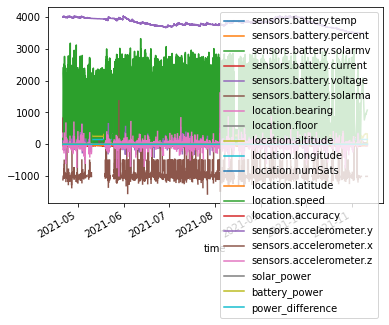

In [23]:
groupByDeviceIdAndTimeIndex.loc['015262001281806'].plot()

In [16]:
# groupByDeviceIdAndTimeIndex.columns
columns = ['sensors.battery.temp',
       'sensors.battery.percent', 'sensors.battery.solarmv',
       'sensors.battery.current', 'sensors.battery.voltage',
       'sensors.battery.solarma', 'sensors.battery.charging',
        'solar_power', 'battery_power','power_difference']

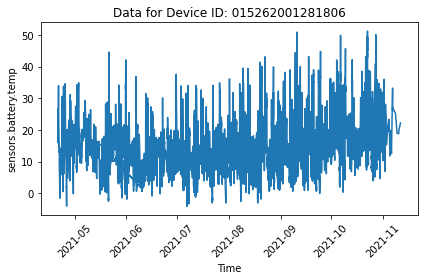

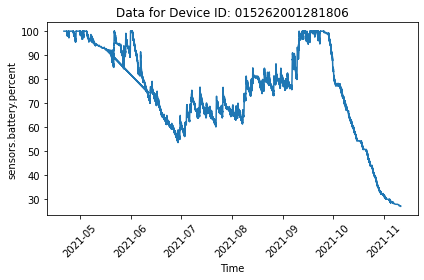

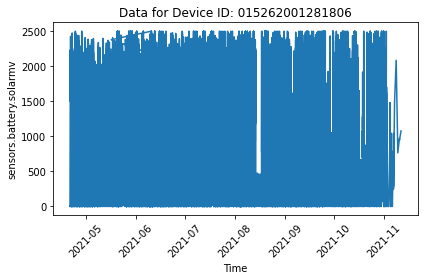

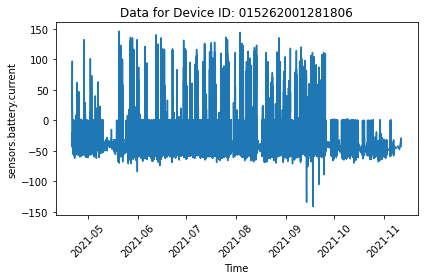

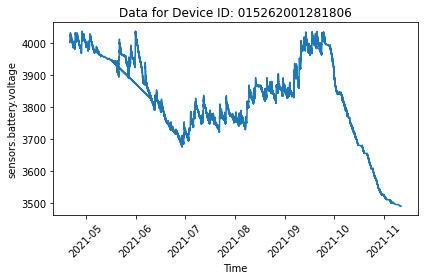

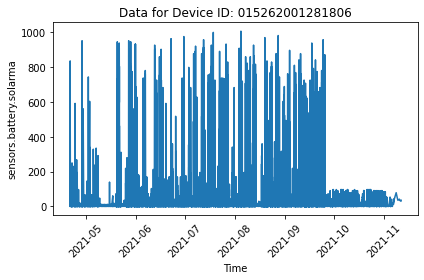

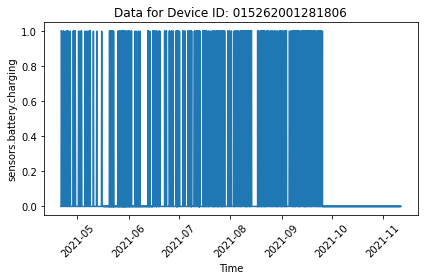

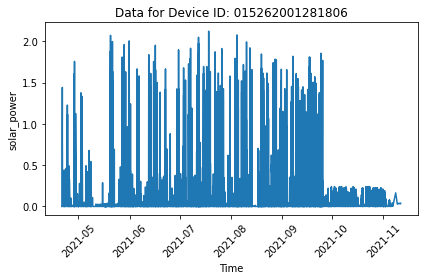

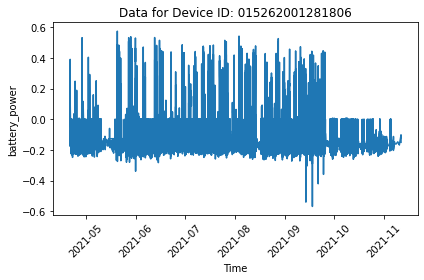

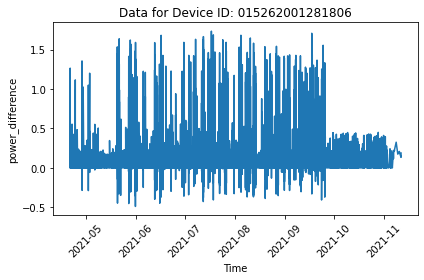

In [17]:
import matplotlib
for column in columns:
    plt.plot(groupByDeviceIdAndTimeIndex.loc['015262001281806'].index.get_level_values('time'),groupByDeviceIdAndTimeIndex.loc['015262001281806'][column], label = column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.title('Data for Device ID: 015262001281806')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

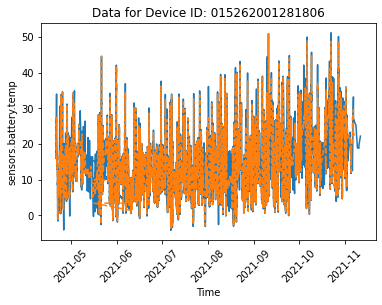

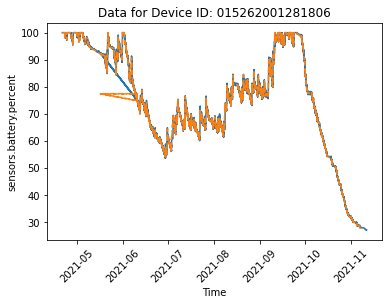

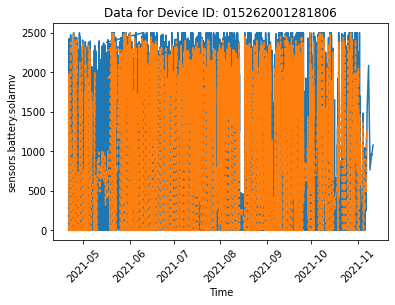

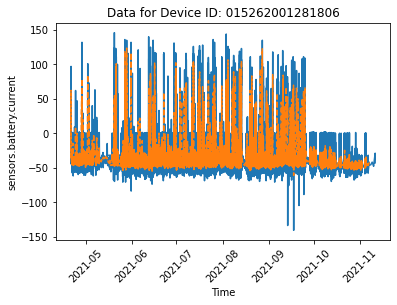

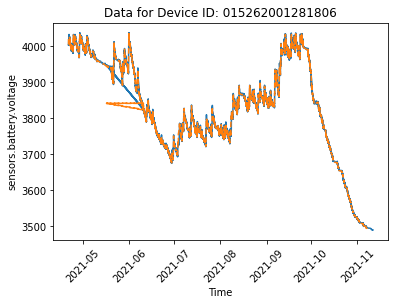

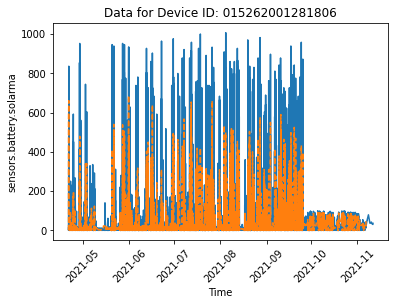

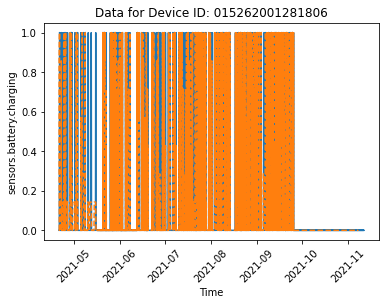

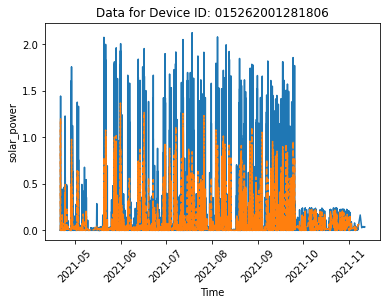

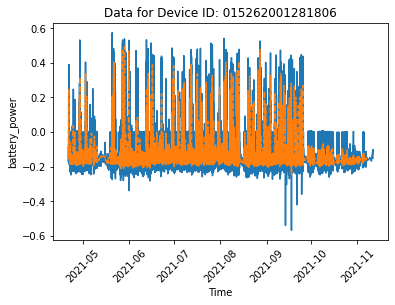

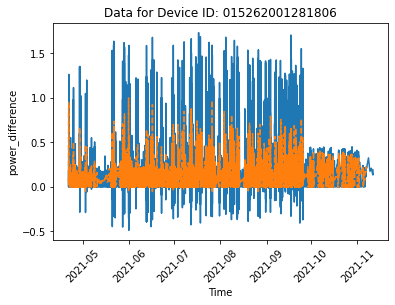

In [18]:
# Calculate a simple moving average
window_size = 7

for column in columns:
    x = groupByDeviceIdAndTimeIndex.loc['015262001281806'].index.get_level_values('time')
    y = groupByDeviceIdAndTimeIndex.loc['015262001281806'][column]
    moving_avg = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
    plt.plot(x,y, label = column)
    plt.plot(x[:len(moving_avg)], moving_avg, label=f"{window_size}-point Moving Average", linestyle='--')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.title('Data for Device ID: 015262001281806')
    plt.xticks(rotation=45)
#     plt.tight_layout()
    plt.show()

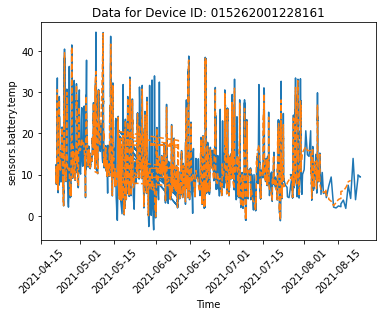

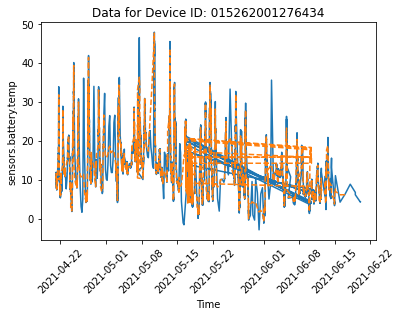

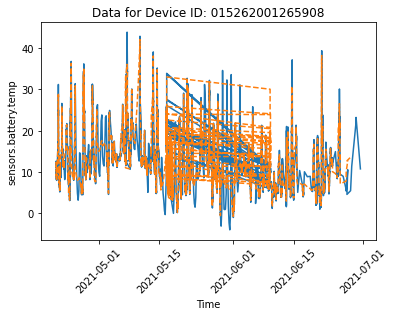

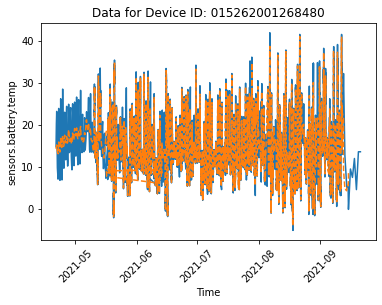

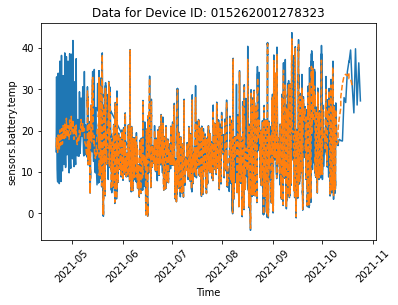

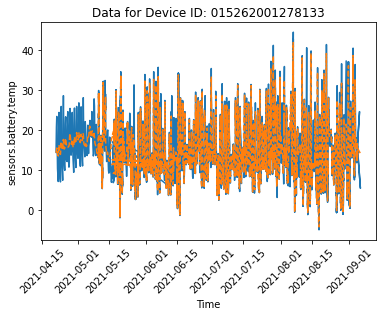

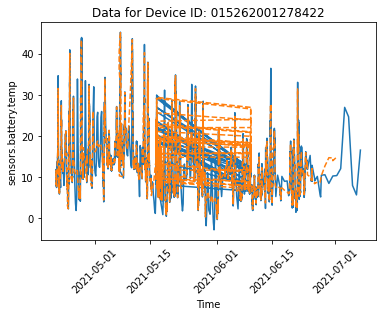

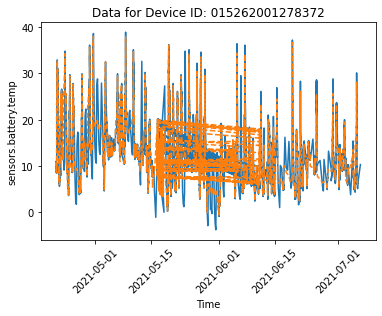

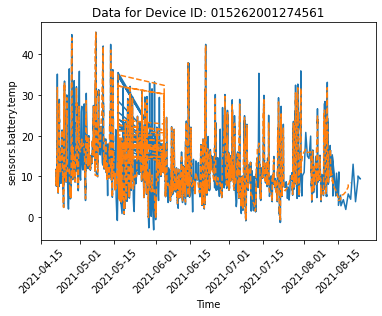

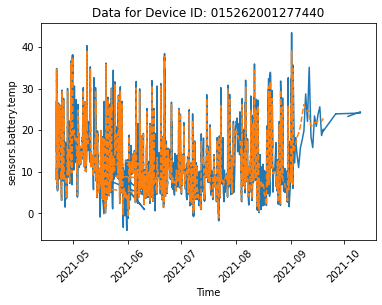

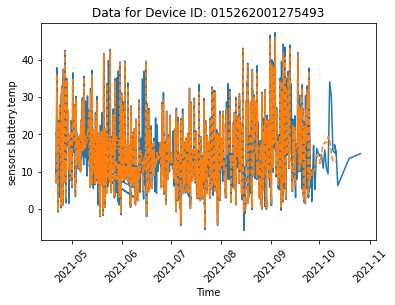

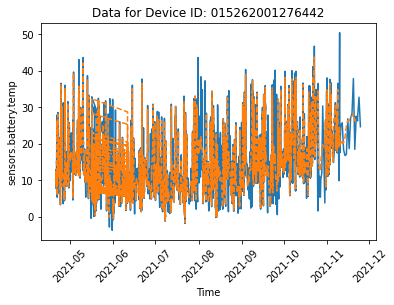

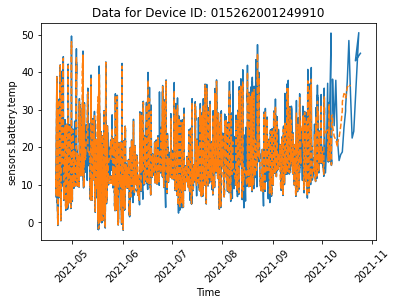

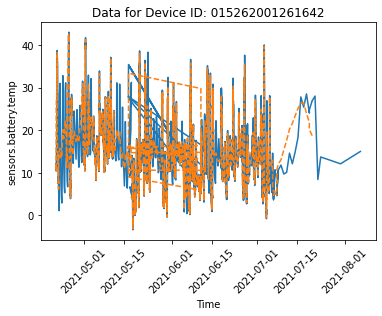

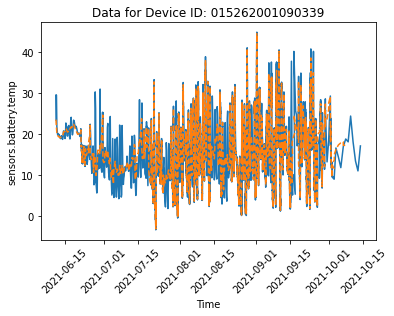

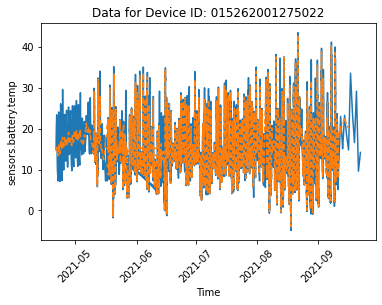

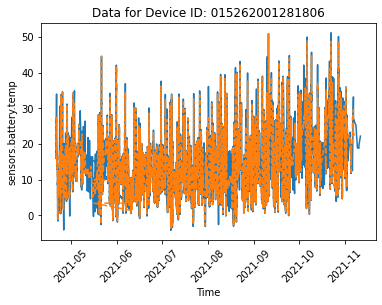

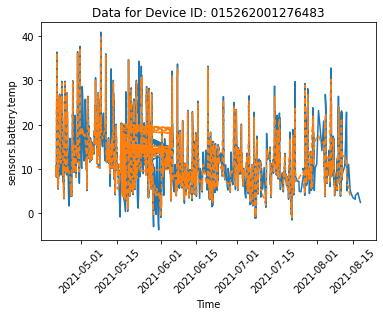

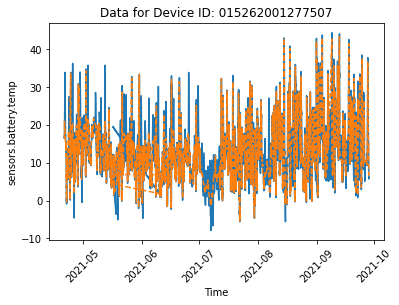

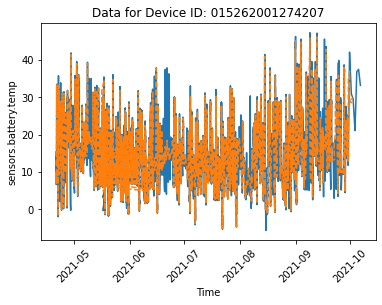

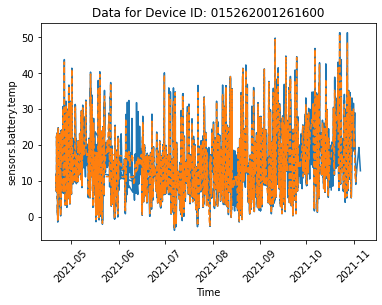

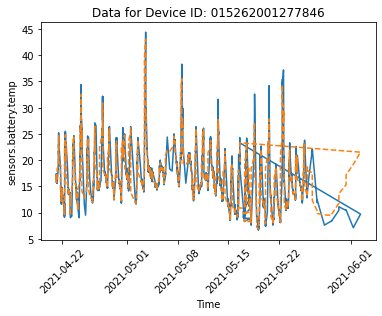

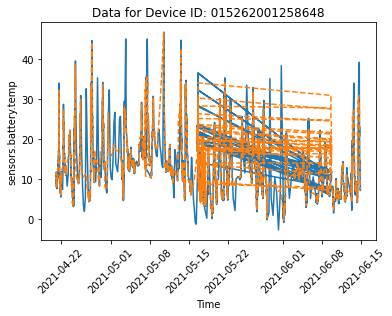

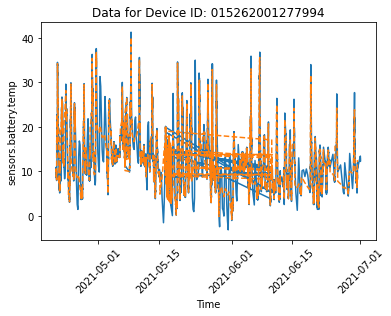

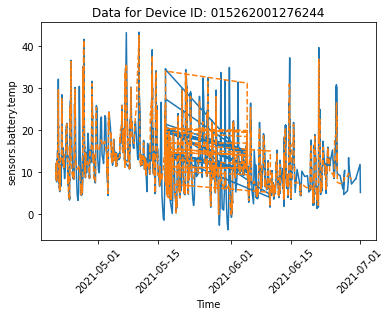

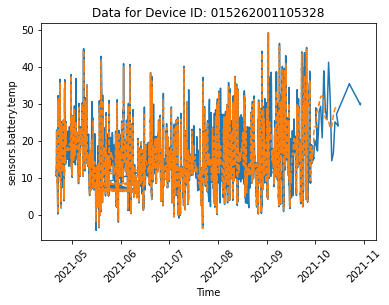

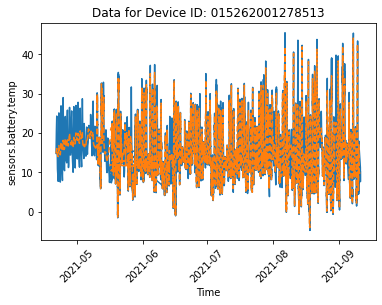

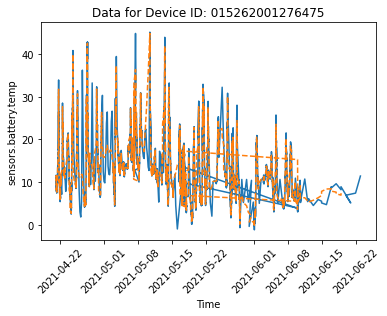

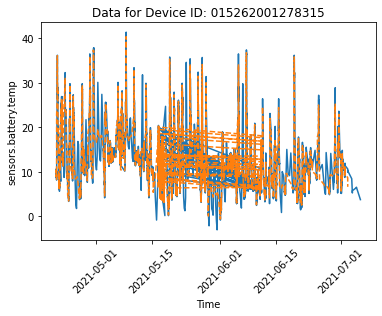

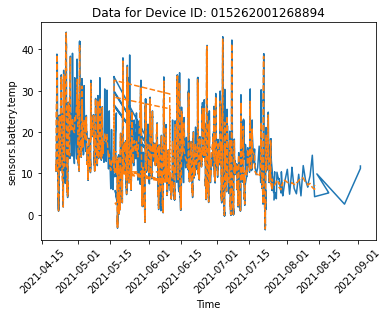

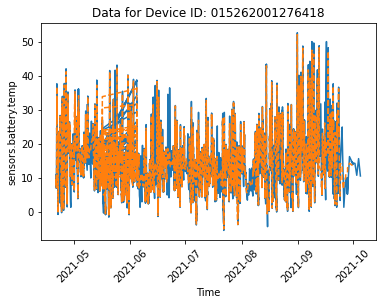

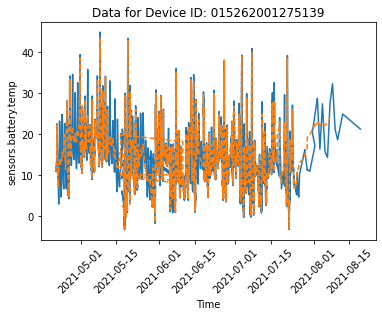

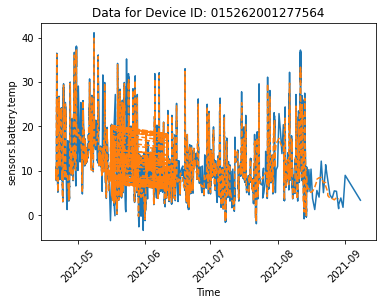

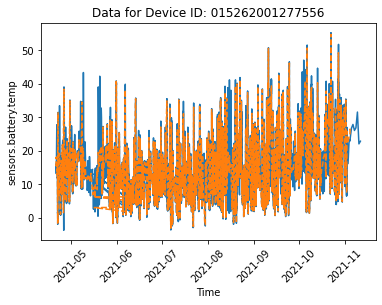

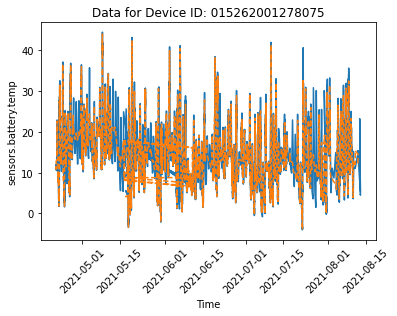

In [24]:
# For all device IDs
for deviceId in set(groupByDeviceIdAndTimeIndex.index.get_level_values('DeviceId')):
    for column in ['sensors.battery.temp']:
        x = groupByDeviceIdAndTimeIndex.loc[deviceId].index.get_level_values('time')
        y = groupByDeviceIdAndTimeIndex.loc[deviceId][column]
        moving_avg = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
        plt.plot(x,y, label = column)
        plt.plot(x[:len(moving_avg)], moving_avg, label=f"{window_size}-point Moving Average", linestyle='--')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.title('Data for Device ID: '+deviceId)
        plt.xticks(rotation=45)
    #     plt.tight_layout()
        plt.show()

#     print(deviceId)

In [19]:
# Label devices as malfunctioned or working
# We start by defaulting every row of each device to True
groupByDeviceIdAndTimeIndex["isDeviceWorking"] = True
groupByDeviceIdAndTimeIndex["predictive_parameter"] = None

In [27]:
# Change Point Detection with Pelt (Pruned Exact Linear Time) 

# print("Change Point Detection with Pelt (Pruned Exact Linear Time)")
# for column in columns:
#     x = groupByDeviceIdAndTimeIndex.loc['015262001281806'].index.get_level_values('time')
#     y = groupByDeviceIdAndTimeIndex.loc['015262001281806'][column].values.reshape(-1, 1)
# #     print("Data for device parameter: "+column)
# #     print("Earliest timestamp recorded: ",x[0])
# #     print("Latest timestamp recorded: ",x[-1])
# #     Minimum length of a segment should be 1000 data points - A hypermeter
#     algo = rpt.Pelt(model="l2", min_size=4000)
#     algo.fit(y)
#     result = algo.predict(pen=1)
#     rpt.display(y, [], result)

Change Point Detection With The Bottom-Up Method and number of breakpoints =  3


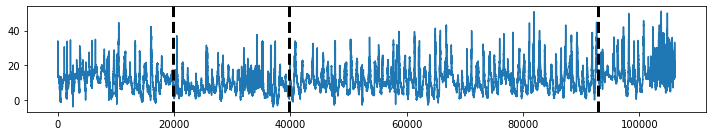

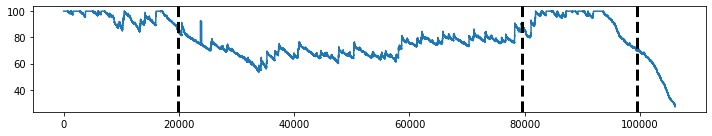

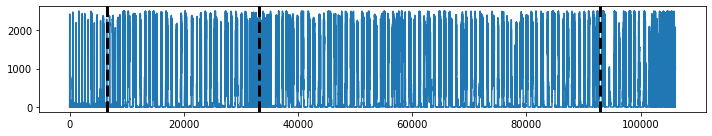

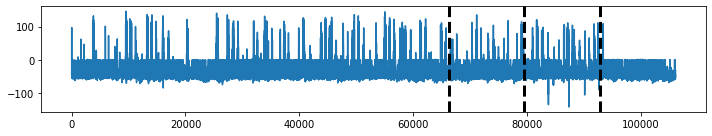

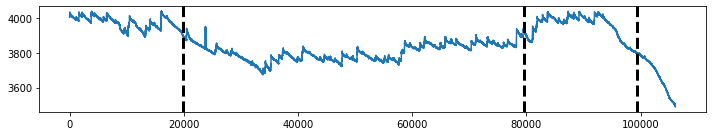

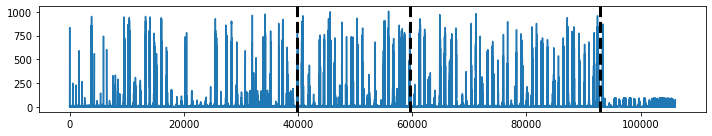

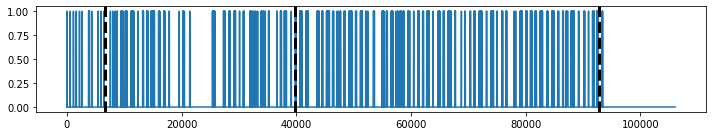

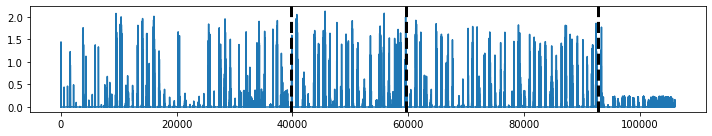

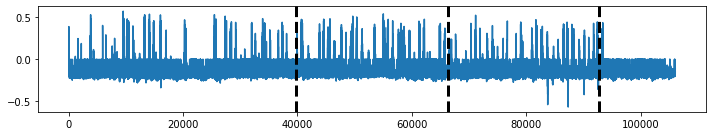

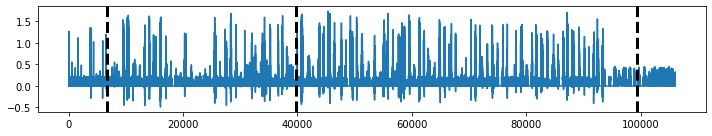

In [28]:
# Detecting Change Points With The Bottom-Up Method
# n_bkps is a hyperparameter that requires tuning - number of change points

breakpoints=3
print("Change Point Detection With The Bottom-Up Method and number of breakpoints = ",breakpoints)
for column in columns:
    x = groupByDeviceIdAndTimeIndex.loc['015262001281806'].index.get_level_values('time')
    y = groupByDeviceIdAndTimeIndex.loc['015262001281806'][column].values.reshape(-1, 1)
    algo = rpt.BottomUp(model="l2", min_size=4000)
    algo.fit(y)
    result = algo.predict(n_bkps=breakpoints)
#     print(result)
    rpt.display(y, [], result)

In [74]:
devices = set(groupByDeviceIdAndTimeIndex.index.get_level_values('DeviceId'))
for device in devices:
    print(device)

015262001277556
015262001228161
015262001278075
015262001277507
015262001276442
015262001277564
015262001276418
015262001276244
015262001105328
015262001275022
015262001275139
015262001278315
015262001276475
015262001278513
015262001277440
015262001277994
015262001274207
015262001275493
015262001261600
015262001261642
015262001249910
015262001276434
015262001268480
015262001258648
015262001277846
015262001268894
015262001278133
015262001265908
015262001278323
015262001278372
015262001274561
015262001278422
015262001090339
015262001281806
015262001276483


Change Point Detection With The Bottom-Up Method and number of breakpoints =  3
[9430, 14145, 18860, 37725]
[9430, 28290, 33005, 37725]
[4715, 14145, 18860, 37725]
[9430, 14145, 18860, 37725]
[9430, 28290, 33005, 37725]
[9430, 14145, 18860, 37725]
[4715, 14145, 18860, 37725]
[9430, 14145, 18860, 37725]
[9430, 14145, 18860, 37725]
[9430, 14145, 18860, 37725]
[18860, 33005, 18860, 18860, 33005, 18860, 18860, 18860, 18860, 18860]
[(18860, 8)]
18860


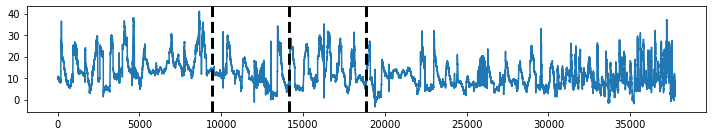

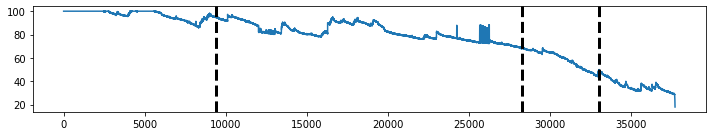

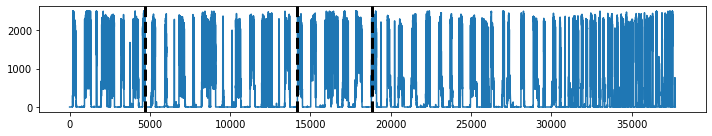

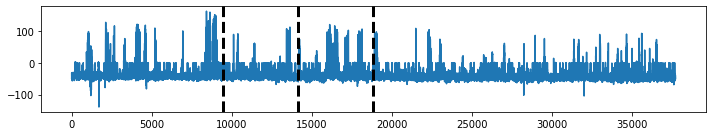

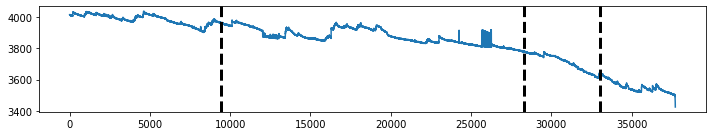

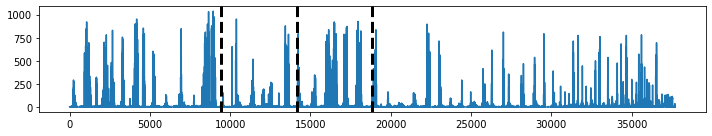

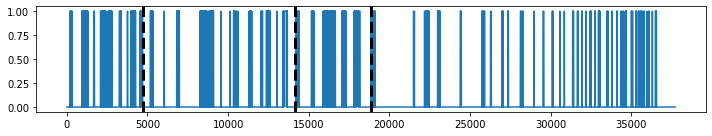

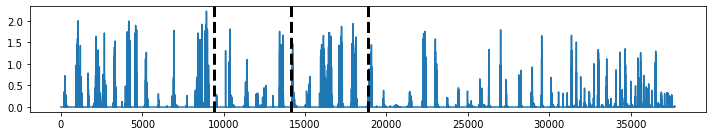

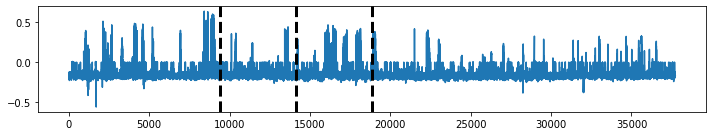

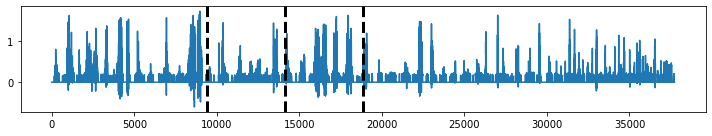

In [37]:
# Now, I manually analyse each device's parameters and estimate when the device faulted.
# This is to get true values for labelling devices.

# Change value of device Id in each run from the devices set
deviceId = '015262001277564'

breakpoints=3
last_detection_point = []
print("Change Point Detection With The Bottom-Up Method and number of breakpoints = ",breakpoints)
for column in columns:
    x = groupByDeviceIdAndTimeIndex.loc[deviceId].index.get_level_values('time')
    y = groupByDeviceIdAndTimeIndex.loc[deviceId][column].values.reshape(-1, 1)
    algo = rpt.BottomUp(model="l2", min_size=4000)
    algo.fit(y)
    result = algo.predict(n_bkps=breakpoints)
#     result has the index of timestamps, which we can use to extract the timestamp values manually, for labelling
    last_detection_point.append(result[2])
    print(result)
    rpt.display(y, [], result)
print(last_detection_point)
# # Returns the highest occurring final detection point
print(Counter(last_detection_point).most_common(1))
malfunction_time_index = Counter(last_detection_point).most_common(1)[0][0]
print(malfunction_time_index)

In [40]:
# From Manual analysis of above cell's output, a date of malfunction is decided
malfunction_time_index = 18860
date_of_malfunction = x[malfunction_time_index]
print("Date Of Malfunction: ",date_of_malfunction)
# # Update all values after the specified timestamp
groupByDeviceIdAndTimeIndex.loc[(groupByDeviceIdAndTimeIndex.index.get_level_values('DeviceId') == deviceId) & 
                                (groupByDeviceIdAndTimeIndex.index.get_level_values('time') >= date_of_malfunction),
                               'isDeviceWorking'] = False


groupByDeviceIdAndTimeIndex.loc[(groupByDeviceIdAndTimeIndex.index.get_level_values('DeviceId') == deviceId)]

Date Of Malfunction:  2021-05-28 07:54:32+10:00


Id  \
DeviceId        time                                   
015262001277564 2021-04-21 03:11:02+10:00       6643   
                2021-04-21 03:06:03+10:00       6654   
                2021-04-21 03:07:03+10:00       6657   
                2021-04-21 03:05:07+10:00       6659   
                2021-04-21 03:10:03+10:00       6663   
...                                              ...   
                2021-08-30 02:47:02+10:00  106888032   
                2021-08-30 02:47:57+10:00  106888033   
                2021-08-31 02:48:32+10:00  107852318   
                2021-09-01 02:48:31+10:00  114196665   
                2021-09-08 02:48:40+10:00  120897513   

                                                                    CreatedAt  \
DeviceId        time                                                            
015262001277564 2021-04-21 03:11:02+10:00  2021-04-20 17:12:17.1477784 +00:00   
                2021-04-21 03:06:03+10:00  2021-04-20 17:12:17.8590133 +00:00   
                2021-04-21 03:07:03+10:00  2021-04-20 17:12:17.9590134 +00:00   
                2021-04-21 03:05:07+10:00  2021-04-20 17:12:18.0448492 +00:00   
                2021-04-21 03:10:03+10:00  2021-04-20 17:12:18.1298533 +00:00   
...                                                                       ...   
                2021-08-30 02:47:02+10:00  2021-08-29 16:48:26.8295027 +00:00   
                2021-08-30 02:47:57+10:00  2021-08-29 16:48:26.9725957 +00:00   
                2021-08-31 02:48:32+10:00  2021-08-30 16:49:13.0203329 +00:00   
                2021-09-01 02:48:31+10:00  2021-09-06 16:49:49.7915238 +00:00   
                2021-09-08 02:48:40+10:00  2021-09-13 16:50:33.4083285 +00:00   

                                                                    UpdatedAt  \
DeviceId        time                                                            
015262001277564 2021-04-21 03:11:02+10:00  2021-04-20 17:12:17.2877059 +00:00   
                2021-04-21 03:06:03+10:00  2021-04-20 17:12:17.9490064 +00:00   
                2021-04-21 03:07:03+10:00  2021-04-20 17:12:18.0398596 +00:00   
                2021-04-21 03:05:07+10:00  2021-04-20 17:12:18.1248477 +00:00   
                2021-04-21 03:10:03+10:00  2021-04-20 17:12:18.2098846 +00:00   
...                                                                       ...   
                2021-08-30 02:47:02+10:00  2021-08-29 16:48:26.9325876 +00:00   
                2021-08-30 02:47:57+10:00  2021-08-29 16:48:27.0975979 +00:00   
                2021-08-31 02:48:32+10:00  2021-08-30 16:49:13.1253369 +00:00   
                2021-09-01 02:48:31+10:00  2021-09-06 16:49:49.8881273 +00:00   
                2021-09-08 02:48:40+10:00  2021-09-13 16:50:33.5240927 +00:00   

                                          State             timeStamp   event  \
DeviceId        time                                                            
015262001277564 2021-04-21 03:11:02+10:00     1  2021-04-20T17:11:02Z  moving   
                2021-04-21 03:06:03+10:00     1  2021-04-20T17:06:03Z  moving   
                2021-04-21 03:07:03+10:00     1  2021-04-20T17:07:03Z  moving   
                2021-04-21 03:05:07+10:00     1  2021-04-20T17:05:07Z  moving   
                2021-04-21 03:10:03+10:00     1  2021-04-20T17:10:03Z  moving   
...                                         ...                   ...     ...   
                2021-08-30 02:47:02+10:00     1  2021-08-29T16:47:02Z  moving   
                2021-08-30 02:47:57+10:00     1  2021-08-29T16:47:57Z  moving   
                2021-08-31 02:48:32+10:00     1  2021-08-30T16:48:32Z  moving   
                2021-09-01 02:48:31+10:00     1  2021-08-31T16:48:31Z  moving   
                2021-09-08 02:48:40+10:00     1  2021-09-07T16:48:40Z  moving   

                                           sensors.battery.extpower  \
DeviceId        time                                                  
015262001277564 2

In [57]:
groupByDeviceIdAndTimeIndex.loc[(groupByDeviceIdAndTimeIndex.index.get_level_values('DeviceId') == deviceId) & 
                                (groupByDeviceIdAndTimeIndex.index.get_level_values('time') >= date_of_malfunction)]

Id  \
DeviceId        time                                   
015262001281806 2021-09-24 20:39:05+10:00  132400426   
                2021-09-24 20:41:04+10:00  132400433   
                2021-09-24 20:38:12+10:00  132400437   
                2021-09-24 20:41:24+10:00  132400439   
                2021-09-24 20:37:12+10:00  132400444   
...                                              ...   
                2021-11-09 09:42:02+11:00  180252277   
                2021-11-10 09:42:09+11:00  181504012   
                2021-11-10 09:45:07+11:00  181506410   
                2021-11-11 09:45:49+11:00  182951313   
                2021-11-11 09:46:42+11:00  182951330   

                                                                    CreatedAt  \
DeviceId        time                                                            
015262001281806 2021-09-24 20:39:05+10:00  2021-09-24 10:41:54.7651857 +00:00   
                2021-09-24 20:41:04+10:00  2021-09-24 10:41:54.8851805 +00:00   
                2021-09-24 20:38:12+10:00  2021-09-24 10:41:55.0151519 +00:00   
                2021-09-24 20:41:24+10:00  2021-09-24 10:41:55.0801518 +00:00   
                2021-09-24 20:37:12+10:00  2021-09-24 10:41:55.1501517 +00:00   
...                                                                       ...   
                2021-11-09 09:42:02+11:00  2021-11-08 22:43:24.7799104 +00:00   
                2021-11-10 09:42:09+11:00  2021-11-09 22:43:59.2773657 +00:00   
                2021-11-10 09:45:07+11:00  2021-11-09 22:45:46.6696165 +00:00   
                2021-11-11 09:45:49+11:00  2021-11-10 22:47:13.3218742 +00:00   
                2021-11-11 09:46:42+11:00  2021-11-10 22:47:14.6460082 +00:00   

                                                                    UpdatedAt  \
DeviceId        time                                                            
015262001281806 2021-09-24 20:39:05+10:00  2021-09-24 10:41:54.8551544 +00:00   
                2021-09-24 20:41:04+10:00  2021-09-24 10:41:54.9601541 +00:00   
                2021-09-24 20:38:12+10:00  2021-09-24 10:41:55.0701873 +00:00   
                2021-09-24 20:41:24+10:00  2021-09-24 10:41:55.1451557 +00:00   
                2021-09-24 20:37:12+10:00  2021-09-24 10:41:55.2101521 +00:00   
...                                                                       ...   
                2021-11-09 09:42:02+11:00  2021-11-08 22:43:24.9448962 +00:00   
                2021-11-10 09:42:09+11:00  2021-11-09 22:43:59.4323787 +00:00   
                2021-11-10 09:45:07+11:00  2021-11-09 22:45:46.7695915 +00:00   
                2021-11-11 09:45:49+11:00  2021-11-10 22:47:13.5476233 +00:00   
                2021-11-11 09:46:42+11:00  2021-11-10 22:47:14.7617049 +00:00   

                                          State             timeStamp  \
DeviceId        time                                                    
015262001281806 2021-09-24 20:39:05+10:00     1  2021-09-24T10:39:05Z   
                2021-09-24 20:41:04+10:00     1  2021-09-24T10:41:04Z   
                2021-09-24 20:38:12+10:00     1  2021-09-24T10:38:12Z   
                2021-09-24 20:41:24+10:00     1  2021-09-24T10:41:24Z   
                2021-09-24 20:37:12+10:00     1  2021-09-24T10:37:12Z   
...                                         ...                   ...   
                2021-11-09 09:42:02+11:00     1  2021-11-08T22:42:02Z   
                2021-11-10 09:42:09+11:00     1  2021-11-09T22:42:09Z   
                2021-11-10 09:45:07+11:00     1  2021-11-09T22:45:07Z   
                2021-11-11 09:45:49+11:00     1  2021-11-10T22:45:49Z   
                2021-11-11 09:46:42+11:00     1  2021-11-10T22:46:42Z   

                                             event  sensors.battery.extpower  \
DeviceId        time                                                           
015262001281806 2021-09-24 20:39:05+10:00   moving                     False   
                2021-09

In [40]:
groupByDeviceIdAndTimeIndex

Id  \
DeviceId        time                                   
015262001277846 2021-04-21 03:18:26+10:00      10046   
                2021-04-21 03:17:52+10:00      10049   
                2021-04-21 03:27:29+10:00      15189   
                2021-04-21 03:28:29+10:00      15190   
                2021-04-21 03:21:30+10:00      15191   
...                                              ...   
015262001276442 2021-11-22 13:01:23+11:00  195389569   
                2021-11-22 13:04:17+11:00  195391320   
                2021-11-23 13:05:02+11:00  196545125   
                2021-11-24 13:05:36+11:00  197957676   
                2021-11-24 13:05:02+11:00  197957683   

                                                                    CreatedAt  \
DeviceId        time                                                            
015262001277846 2021-04-21 03:18:26+10:00  2021-04-20 17:18:57.3601057 +00:00   
                2021-04-21 03:17:52+10:00  2021-04-20 17:18:57.9206698 +00:00   
                2021-04-21 03:27:29+10:00  2021-04-20 17:30:00.0973275 +00:00   
                2021-04-21 03:28:29+10:00  2021-04-20 17:30:00.5204188 +00:00   
                2021-04-21 03:21:30+10:00  2021-04-20 17:30:00.6604193 +00:00   
...                                                                       ...   
015262001276442 2021-11-22 13:01:23+11:00  2021-11-22 02:02:07.3194074 +00:00   
                2021-11-22 13:04:17+11:00  2021-11-22 02:04:57.8307232 +00:00   
                2021-11-23 13:05:02+11:00  2021-11-23 02:05:44.6179891 +00:00   
                2021-11-24 13:05:36+11:00  2021-11-24 02:06:18.7314233 +00:00   
                2021-11-24 13:05:02+11:00  2021-11-24 02:06:19.3460223 +00:00   

                                                                    UpdatedAt  \
DeviceId        time                                                            
015262001277846 2021-04-21 03:18:26+10:00  2021-04-20 17:18:57.4751133 +00:00   
                2021-04-21 03:17:52+10:00  2021-04-20 17:18:58.0006530 +00:00   
                2021-04-21 03:27:29+10:00  2021-04-20 17:30:00.1973672 +00:00   
                2021-04-21 03:28:29+10:00  2021-04-20 17:30:00.6554035 +00:00   
                2021-04-21 03:21:30+10:00  2021-04-20 17:30:00.7254268 +00:00   
...                                                                       ...   
015262001276442 2021-11-22 13:01:23+11:00  2021-11-22 02:02:07.4609948 +00:00   
                2021-11-22 13:04:17+11:00  2021-11-22 02:04:57.9257593 +00:00   
                2021-11-23 13:05:02+11:00  2021-11-23 02:05:44.7707739 +00:00   
                2021-11-24 13:05:36+11:00  2021-11-24 02:06:18.8826478 +00:00   
                2021-11-24 13:05:02+11:00  2021-11-24 02:06:19.4060168 +00:00   

                                          State             timeStamp  \
DeviceId        time                                                    
015262001277846 2021-04-21 03:18:26+10:00     1  2021-04-20T17:18:26Z   
                2021-04-21 03:17:52+10:00     1  2021-04-20T17:17:52Z   
                2021-04-21 03:27:29+10:00     1  2021-04-20T17:27:29Z   
                2021-04-21 03:28:29+10:00     1  2021-04-20T17:28:29Z   
                2021-04-21 03:21:30+10:00     1  2021-04-20T17:21:30Z   
...                                         ...                   ...   
015262001276442 2021-11-22 13:01:23+11:00     1  2021-11-22T02:01:23Z   
                2021-11-22 13:04:17+11:00     1  2021-11-22T02:04:17Z   
                2021-11-23 13:05:02+11:00     1  2021-11-23T02:05:02Z   
                2021-11-24 13:05:36+11:00     1  2021-11-24T02:05:36Z   
                2021-11-24 13:05:02+11:00     1  2021-11-24T02:05:02Z   

                                             event  sensors.battery.extpower  \
DeviceId        time                                                           
015262001277846 2021-04-21 03:18:26+10:00   moving                     False   
                2021-04

In [150]:
# Store the data in a feather file - binary columnar data format that is designed for speed
# (It's particularly efficient for both reading and writing large DataFrames.)
df_reset_index = groupByDeviceIdAndTimeIndex.reset_index()
df_reset_index.to_feather("MTDataBatch1\Labelled Data\Labelled Batch 1.feather")

In [44]:
# Reading back and setting the MultiIndex
labelled_data = pd.read_feather('MTDataBatch1\Labelled Data\Labelled Batch 1 - Updated.feather')
labelled_data.set_index(['DeviceId', 'time'], inplace=True)
labelled_data

Id  \
DeviceId        time                                   
015262001277846 2021-04-21 03:18:26+10:00      10046   
                2021-04-21 03:17:52+10:00      10049   
                2021-04-21 03:27:29+10:00      15189   
                2021-04-21 03:28:29+10:00      15190   
                2021-04-21 03:21:30+10:00      15191   
...                                              ...   
015262001276442 2021-11-22 13:01:23+11:00  195389569   
                2021-11-22 13:04:17+11:00  195391320   
                2021-11-23 13:05:02+11:00  196545125   
                2021-11-24 13:05:36+11:00  197957676   
                2021-11-24 13:05:02+11:00  197957683   

                                                                    CreatedAt  \
DeviceId        time                                                            
015262001277846 2021-04-21 03:18:26+10:00  2021-04-20 17:18:57.3601057 +00:00   
                2021-04-21 03:17:52+10:00  2021-04-20 17:18:57.9206698 +00:00   
                2021-04-21 03:27:29+10:00  2021-04-20 17:30:00.0973275 +00:00   
                2021-04-21 03:28:29+10:00  2021-04-20 17:30:00.5204188 +00:00   
                2021-04-21 03:21:30+10:00  2021-04-20 17:30:00.6604193 +00:00   
...                                                                       ...   
015262001276442 2021-11-22 13:01:23+11:00  2021-11-22 02:02:07.3194074 +00:00   
                2021-11-22 13:04:17+11:00  2021-11-22 02:04:57.8307232 +00:00   
                2021-11-23 13:05:02+11:00  2021-11-23 02:05:44.6179891 +00:00   
                2021-11-24 13:05:36+11:00  2021-11-24 02:06:18.7314233 +00:00   
                2021-11-24 13:05:02+11:00  2021-11-24 02:06:19.3460223 +00:00   

                                                                    UpdatedAt  \
DeviceId        time                                                            
015262001277846 2021-04-21 03:18:26+10:00  2021-04-20 17:18:57.4751133 +00:00   
                2021-04-21 03:17:52+10:00  2021-04-20 17:18:58.0006530 +00:00   
                2021-04-21 03:27:29+10:00  2021-04-20 17:30:00.1973672 +00:00   
                2021-04-21 03:28:29+10:00  2021-04-20 17:30:00.6554035 +00:00   
                2021-04-21 03:21:30+10:00  2021-04-20 17:30:00.7254268 +00:00   
...                                                                       ...   
015262001276442 2021-11-22 13:01:23+11:00  2021-11-22 02:02:07.4609948 +00:00   
                2021-11-22 13:04:17+11:00  2021-11-22 02:04:57.9257593 +00:00   
                2021-11-23 13:05:02+11:00  2021-11-23 02:05:44.7707739 +00:00   
                2021-11-24 13:05:36+11:00  2021-11-24 02:06:18.8826478 +00:00   
                2021-11-24 13:05:02+11:00  2021-11-24 02:06:19.4060168 +00:00   

                                          State             timeStamp  \
DeviceId        time                                                    
015262001277846 2021-04-21 03:18:26+10:00     1  2021-04-20T17:18:26Z   
                2021-04-21 03:17:52+10:00     1  2021-04-20T17:17:52Z   
                2021-04-21 03:27:29+10:00     1  2021-04-20T17:27:29Z   
                2021-04-21 03:28:29+10:00     1  2021-04-20T17:28:29Z   
                2021-04-21 03:21:30+10:00     1  2021-04-20T17:21:30Z   
...                                         ...                   ...   
015262001276442 2021-11-22 13:01:23+11:00     1  2021-11-22T02:01:23Z   
                2021-11-22 13:04:17+11:00     1  2021-11-22T02:04:17Z   
                2021-11-23 13:05:02+11:00     1  2021-11-23T02:05:02Z   
                2021-11-24 13:05:36+11:00     1  2021-11-24T02:05:36Z   
                2021-11-24 13:05:02+11:00     1  2021-11-24T02:05:02Z   

                                             event  sensors.battery.extpower  \
DeviceId        time                                                           
015262001277846 2021-04-21 03:18:26+10:00   moving                     False   
                2021-04

In [45]:
import matplotlib
devices = set(labelled_data.index.get_level_values('DeviceId'))
for device in devices:
    
    x = labelled_data.loc[device].index.get_level_values('time')
    isDeviceWorkingColumn = labelled_data.loc[device]['isDeviceWorking']
    
    if not(isDeviceWorkingColumn.all()): 
        print("Device ", device," stops working after some time? - ", not(isDeviceWorkingColumn.all()))
    else:
        print("Device ", device," stops working after some time? - ", not(isDeviceWorkingColumn.all()),"!!!!")
    
#     If device fails after a certain point, log the predictive parameter that is used to label the malfunction time.
#     if not(isDeviceWorkingColumn.all()):  
#         for column in columns:
#             plt.plot(labelled_data.loc[device].index.get_level_values('time'),labelled_data.loc[device][column], label = column)
#             plt.xlabel('Time')
#             plt.ylabel(column)
#             plt.title('Data for Device ID: '+device)
#             plt.xticks(rotation=45)
#             plt.tight_layout()
#             plt.show()

Device  015262001275139  stops working after some time? -  True
Device  015262001276442  stops working after some time? -  True
Device  015262001276475  stops working after some time? -  True
Device  015262001228161  stops working after some time? -  True
Device  015262001268480  stops working after some time? -  True
Device  015262001276434  stops working after some time? -  True
Device  015262001278323  stops working after some time? -  True
Device  015262001277556  stops working after some time? -  True
Device  015262001277994  stops working after some time? -  True
Device  015262001261600  stops working after some time? -  True
Device  015262001277507  stops working after some time? -  True
Device  015262001261642  stops working after some time? -  True
Device  015262001249910  stops working after some time? -  True
Device  015262001274561  stops working after some time? -  True
Device  015262001275493  stops working after some time? -  True
Device  015262001105328  stops working a

sensors.battery.temp


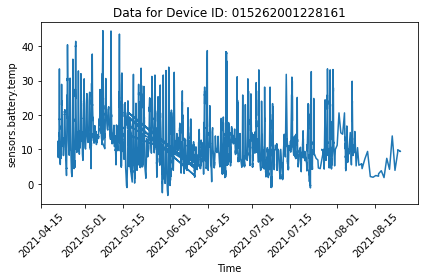

sensors.battery.percent


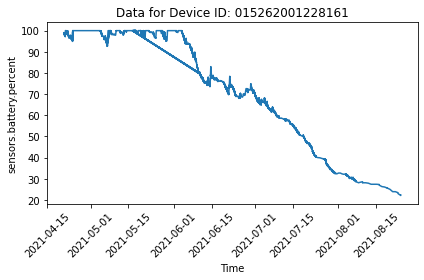

sensors.battery.solarmv


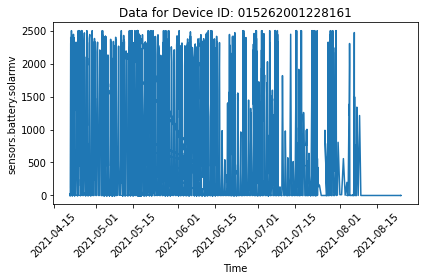

sensors.battery.current


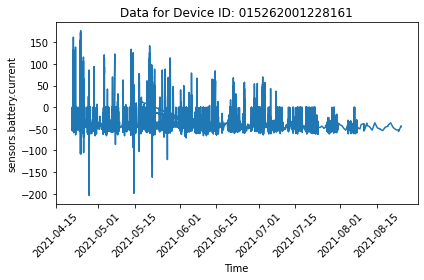

sensors.battery.voltage


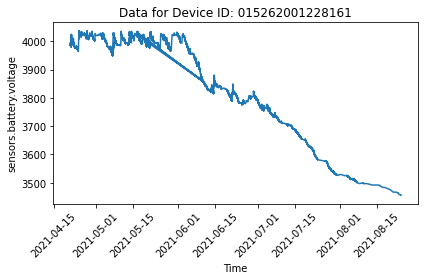

sensors.battery.solarma


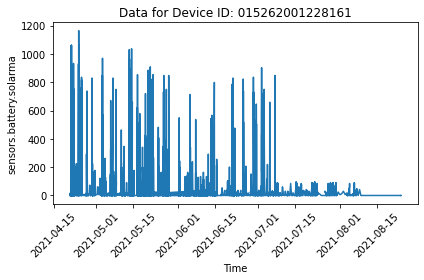

sensors.battery.charging


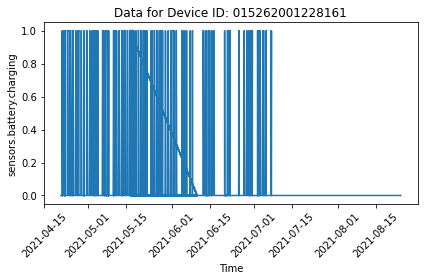

solar_power


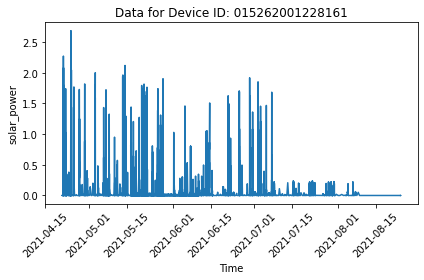

battery_power


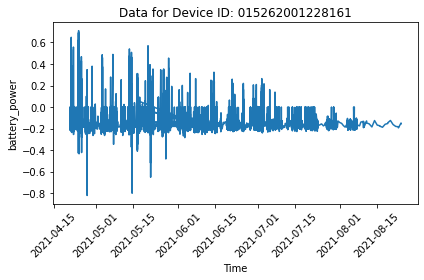

power_difference


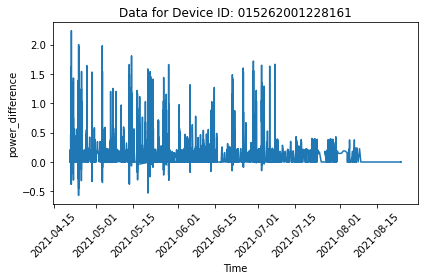

In [23]:
# Manually change this ID
id = '015262001228161'
# From Manual analysis of above cell's output, the predictive features are decided
for column in columns:
    print(column)
    plt.plot(labelled_data.loc[id].index.get_level_values('time'),labelled_data.loc[id][column], label = column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.title('Data for Device ID: '+id)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [101]:
#    If device fails after a certain point, log the predictive parameter that is used to label the malfunction time.
labelled_data.loc[(labelled_data.index.get_level_values('DeviceId') == id) & 
                                (labelled_data['isDeviceWorking'] == False),
                               'predictive_parameter'] = 'sensors.battery.charging'

In [84]:
labelled_data.loc[(labelled_data.index.get_level_values('DeviceId') == id) & 
                                (labelled_data['isDeviceWorking'] == False)]

Id  \
DeviceId        time                                  
015262001276434 2021-04-29 20:02:56+10:00   7439490   
                2021-04-29 19:58:57+10:00   7439491   
                2021-04-29 20:00:57+10:00   7439493   
                2021-04-29 20:03:56+10:00   7439495   
                2021-04-29 19:59:56+10:00   7439501   
...                                             ...   
                2021-06-18 01:37:44+10:00  47788279   
                2021-06-19 01:40:39+10:00  48552930   
                2021-06-19 01:37:50+10:00  48552931   
                2021-06-20 01:41:27+10:00  49240620   
                2021-06-20 01:42:19+10:00  49240623   

                                                                    CreatedAt  \
DeviceId        time                                                            
015262001276434 2021-04-29 20:02:56+10:00  2021-04-29 10:05:10.8206259 +00:00   
                2021-04-29 19:58:57+10:00  2021-04-29 10:05:10.9706259 +00:00   
                2021-04-29 20:00:57+10:00  2021-04-29 10:05:11.0456584 +00:00   
                2021-04-29 20:03:56+10:00  2021-04-29 10:05:11.1156361 +00:00   
                2021-04-29 19:59:56+10:00  2021-04-29 10:05:11.4006674 +00:00   
...                                                                       ...   
                2021-06-18 01:37:44+10:00  2021-06-17 15:38:21.9326001 +00:00   
                2021-06-19 01:40:39+10:00  2021-06-18 15:41:24.6293258 +00:00   
                2021-06-19 01:37:50+10:00  2021-06-18 15:41:24.7393329 +00:00   
                2021-06-20 01:41:27+10:00  2021-06-19 15:42:48.1832852 +00:00   
                2021-06-20 01:42:19+10:00  2021-06-19 15:42:48.2982455 +00:00   

                                                                    UpdatedAt  \
DeviceId        time                                                            
015262001276434 2021-04-29 20:02:56+10:00  2021-04-29 10:05:10.9606553 +00:00   
                2021-04-29 19:58:57+10:00  2021-04-29 10:05:11.0406406 +00:00   
                2021-04-29 20:00:57+10:00  2021-04-29 10:05:11.1056604 +00:00   
                2021-04-29 20:03:56+10:00  2021-04-29 10:05:11.1956703 +00:00   
                2021-04-29 19:59:56+10:00  2021-04-29 10:05:11.4657018 +00:00   
...                                                                       ...   
                2021-06-18 01:37:44+10:00  2021-06-17 15:38:22.0725899 +00:00   
                2021-06-19 01:40:39+10:00  2021-06-18 15:41:24.7343349 +00:00   
                2021-06-19 01:37:50+10:00  2021-06-18 15:41:24.8493538 +00:00   
                2021-06-20 01:41:27+10:00  2021-06-19 15:42:48.2932483 +00:00   
                2021-06-20 01:42:19+10:00  2021-06-19 15:42:48.4283037 +00:00   

                                          State             timeStamp  \
DeviceId        time                                                    
015262001276434 2021-04-29 20:02:56+10:00     1  2021-04-29T10:02:56Z   
                2021-04-29 19:58:57+10:00     1  2021-04-29T09:58:57Z   
                2021-04-29 20:00:57+10:00     1  2021-04-29T10:00:57Z   
                2021-04-29 20:03:56+10:00     1  2021-04-29T10:03:56Z   
                2021-04-29 19:59:56+10:00     1  2021-04-29T09:59:56Z   
...                                         ...                   ...   
                2021-06-18 01:37:44+10:00     1  2021-06-17T15:37:44Z   
                2021-06-19 01:40:39+10:00     1  2021-06-18T15:40:39Z   
                2021-06-19 01:37:50+10:00     1  2021-06-18T15:37:50Z   
                2021-06-20 01:41:27+10:00     1  2021-06-19T15:41:27Z   
                2021-06-20 01:42:19+10:00     1  2021-06-19T15:42:19Z   

                                             event  sensors.battery.extpower  \
DeviceId        time                                                           
015262001276434 2021-04-29 20:02:56+10:00   moving                     False   
                2021-04-29 19:58:57

In [42]:
# NEWLY ADDED CELL TO UPADTED DEVICES AFTER ROB SUGGESTED.
# Change value of device Id in each run from the devices set
deviceId = '015262001277846'
date_of_malfunction = x[malfunction_time_index]

labelled_data.loc[(labelled_data.index.get_level_values('DeviceId') == deviceId) &
                                (labelled_data.index.get_level_values('time') >= date_of_malfunction),
                               'isDeviceWorking'] = False
#    If device fails after a certain point, log the predictive parameter that is used to label the malfunction time.
labelled_data.loc[(labelled_data.index.get_level_values('DeviceId') == id) & 
                                (labelled_data['isDeviceWorking'] == False),
                               'predictive_parameter'] = 'sensors.battery.percent'

In [ ]:
# for device in devicesThatNeedUpdate:
# #     new.loc[(new.index.get_level_values('DeviceId') == device),'isDeviceWorking']
#     new.loc[(new.index.get_level_values('DeviceId') == device),'isDeviceWorking'] = updated.loc[(updated.index.get_level_values('DeviceId') == device),'isDeviceWorking'].values
#     new.loc[(new.index.get_level_values('DeviceId') == device),'predictive_parameter'] = updated.loc[(updated.index.get_level_values('DeviceId') == device),'predictive_parameter'].values


In [43]:
df_reset_index = labelled_data.reset_index()
df_reset_index.to_feather("MTDataBatch1\Labelled Data\Labelled Batch 1 - Updated.feather")